Todo: need to make a new column in SSVEP ML prep function to designate groups for CV. Groups should be from separate experiment sections. In setup: fold_strategy='groupkfold', fold_groups='groups', need to make new column in df called 'groups'.

custom_pipeline for CSP transforms

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import data_postprocessing as dpp

eegData = dpp.eegData(path='Nates')
# can try removing more or fewer channels in code to see what happens with spectrogram noise and ML performance
eegData.load_clean_all_data()

In [3]:
_ = eegData.data.plot(scalings=5)

In [3]:
eegData.get_all_epochs()

In [4]:
eegData.MA_epochs

In [5]:
import mne

Sam's todo:

In [ ]:
eegData.load_clean_one_dataset()
eegData.create_alpha_spectrograms()  # gets called from plot_all_alpha_specs if not already done
eegData.plot_all_alpha_spectrograms()
eegData.create_SSVEP_spectrograms()  # gets called from plot_all_ssvep_specs if not already done
eegData.plot_all_SSVEP_spectrograms()
eegData.prepare_SSVEP_data_for_ml()
eegData.fit_SSVEP_ML_and_report()

In [4]:
eegData.create_alpha_spectrograms()

False Alpha : 0


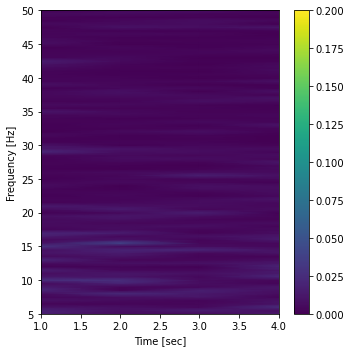

False Alpha : 1


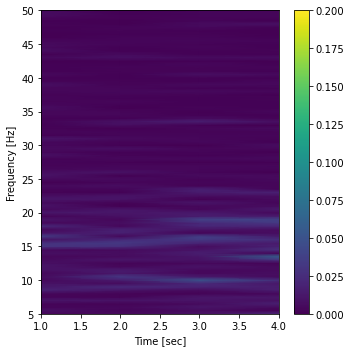

False Alpha : 2


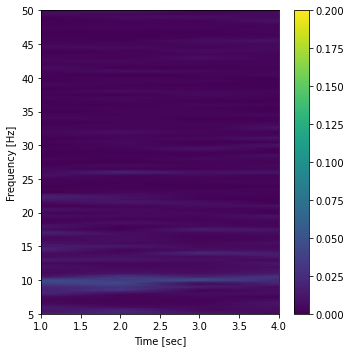

False Alpha : 3


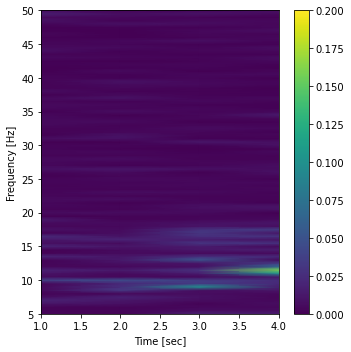

False Alpha : 4


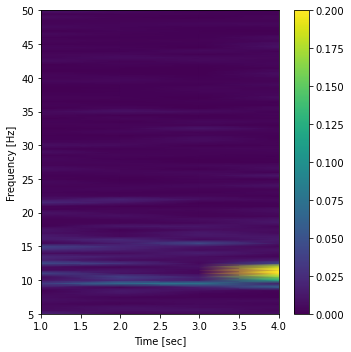

False Alpha : 5


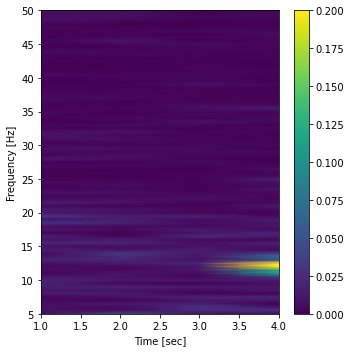

False Alpha : 6


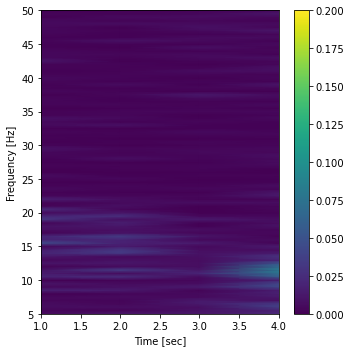

False Alpha : 7


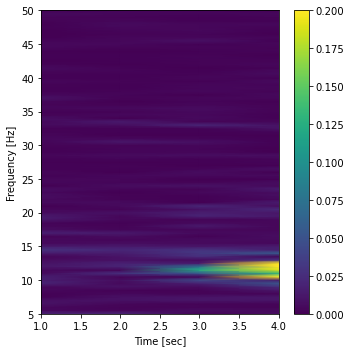

False Alpha : 8


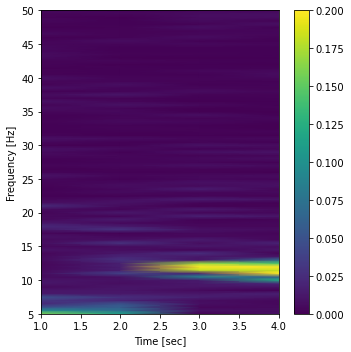

False Alpha : 9


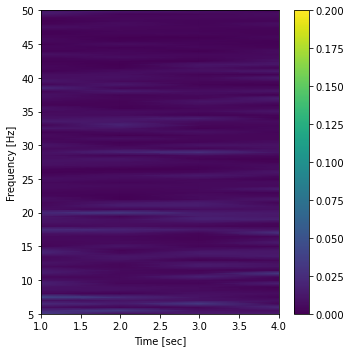

False Alpha : 10


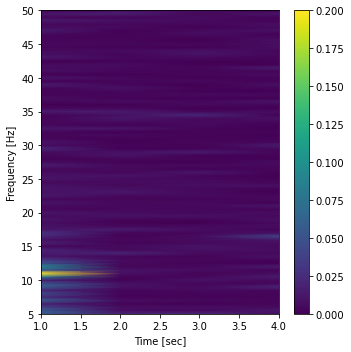

False Alpha : 11


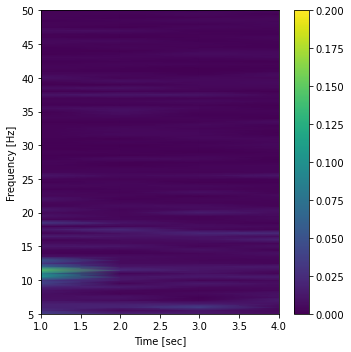

False Alpha : 12


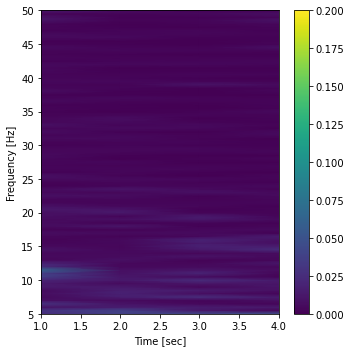

False Alpha : 13


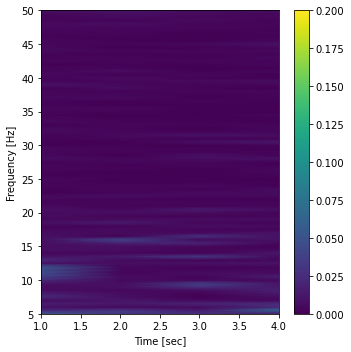

False Alpha : 14


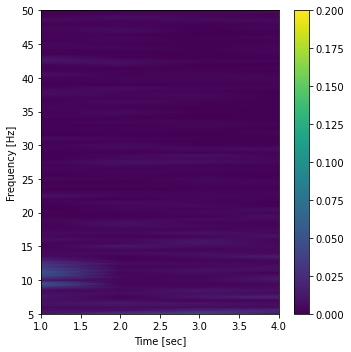

False Alpha : 15


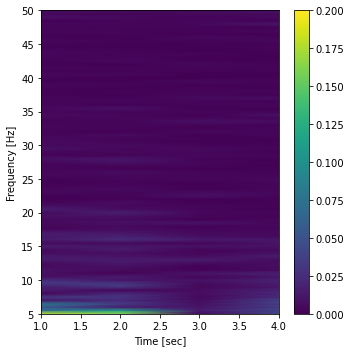

False Alpha : 16


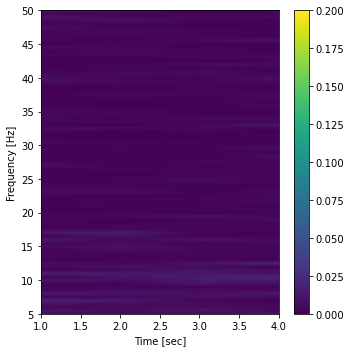

False Alpha : 17


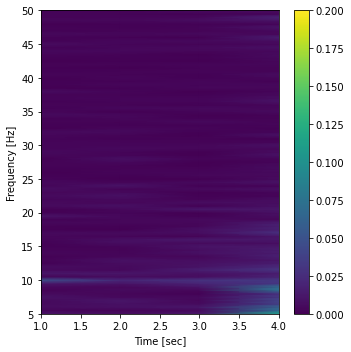

False Alpha : 18


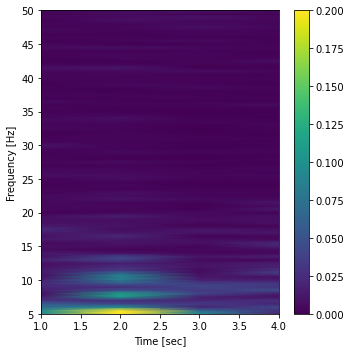

False Alpha : 19


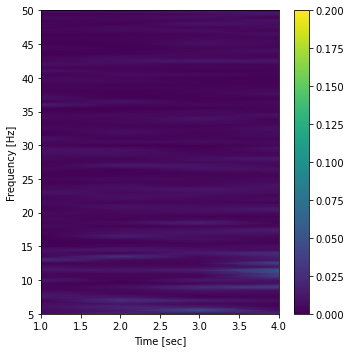

False Alpha : 20


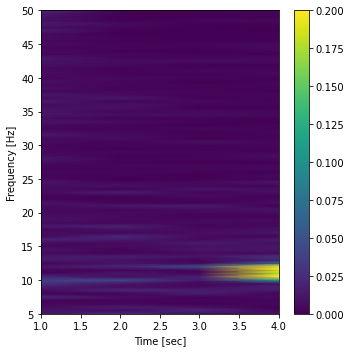

False Alpha : 21


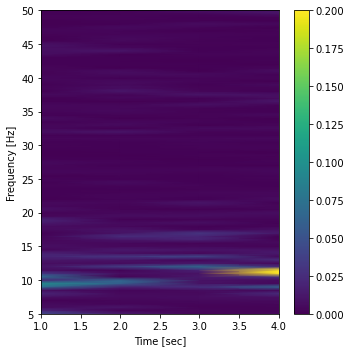

False Alpha : 22


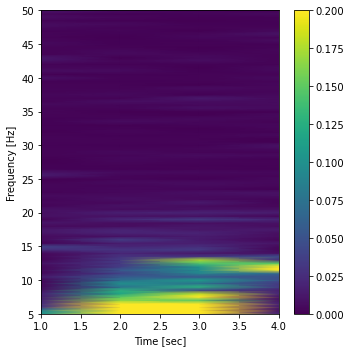

False Alpha : 23


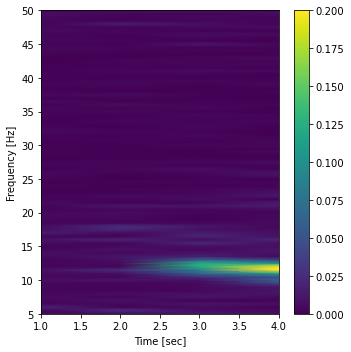

False Alpha : 24


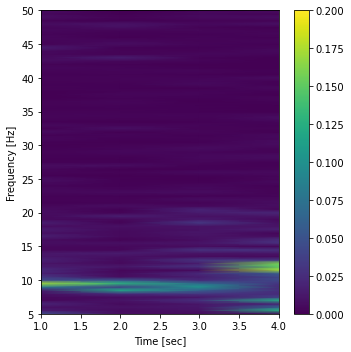

False Alpha : 25


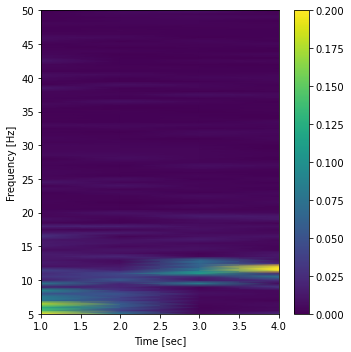

False Alpha : 26


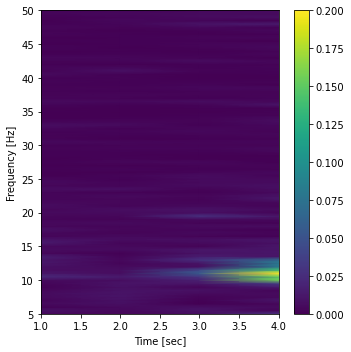

False Alpha : 27


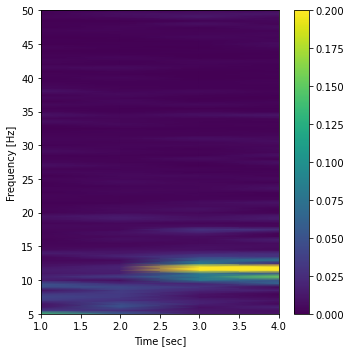

False Alpha : 28


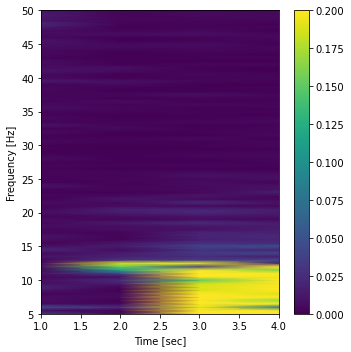

False Alpha : 29


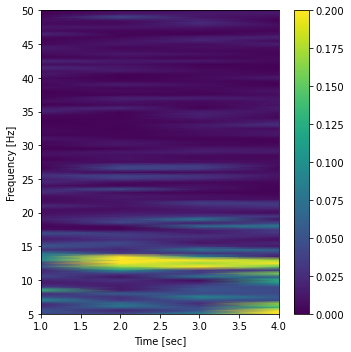

False Alpha : 30


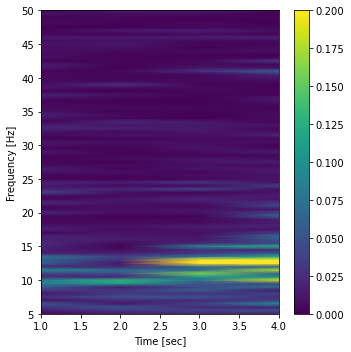

False Alpha : 31


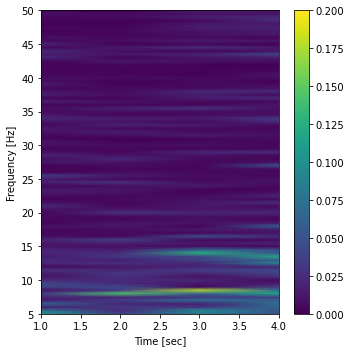

False Alpha : 32


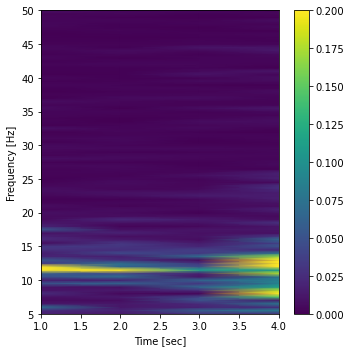

False Alpha : 33


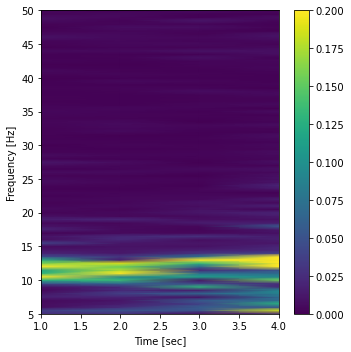

False Alpha : 34


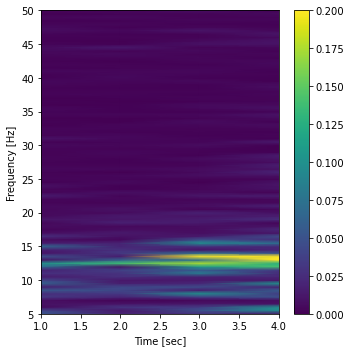

False Alpha : 35


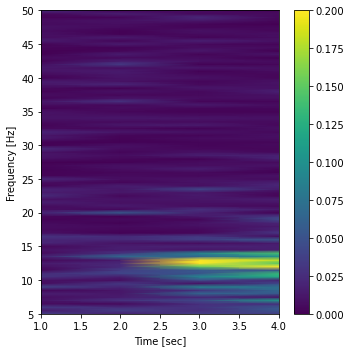

False Alpha : 36


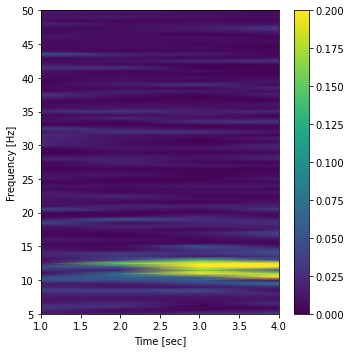

False Alpha : 37


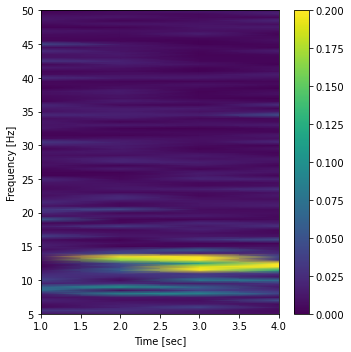

False Alpha : 38


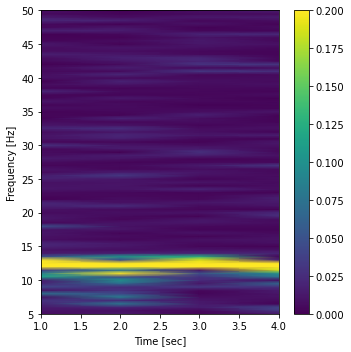

False Alpha : 39


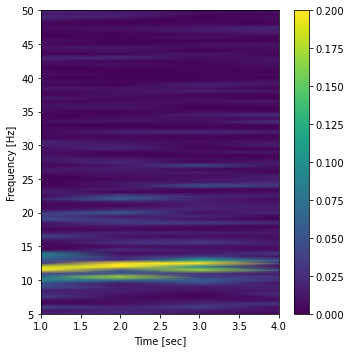

False Alpha : 40


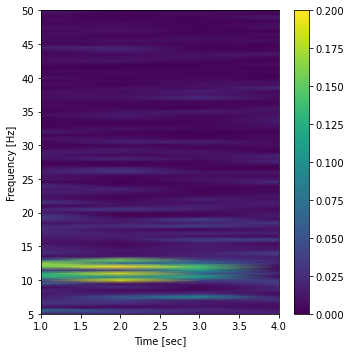

True Alpha : 0


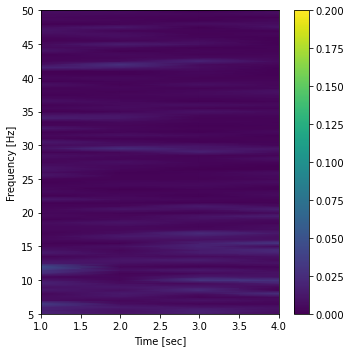

True Alpha : 1


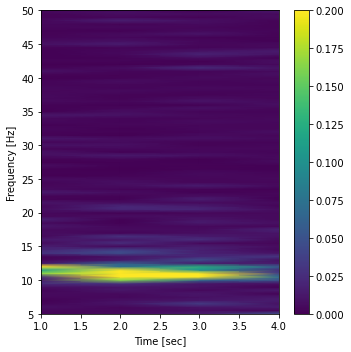

True Alpha : 2


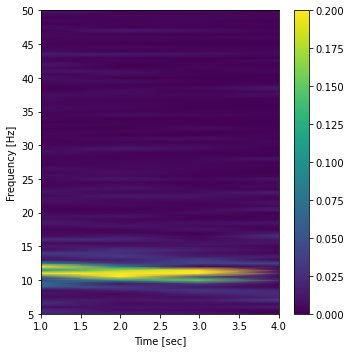

True Alpha : 3


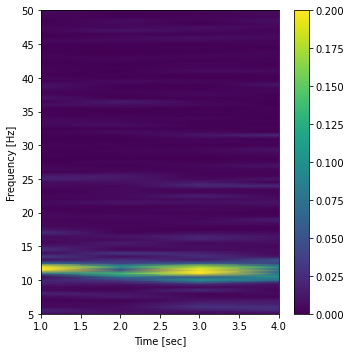

True Alpha : 4


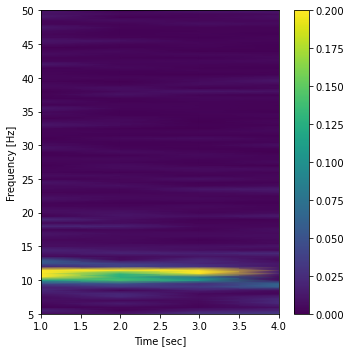

True Alpha : 5


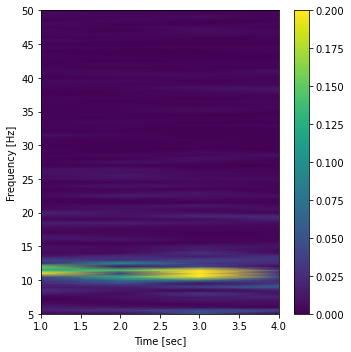

True Alpha : 6


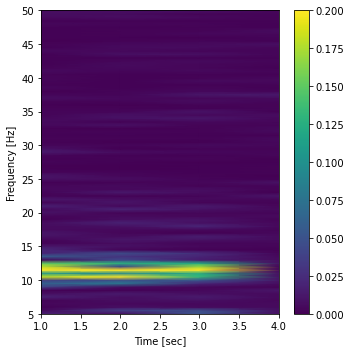

True Alpha : 7


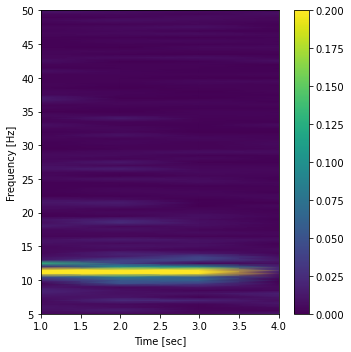

True Alpha : 8


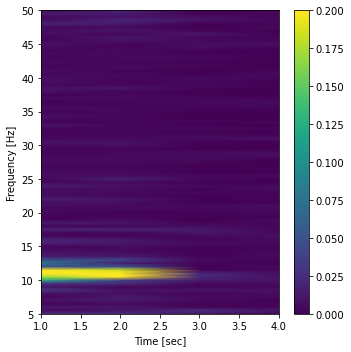

True Alpha : 9


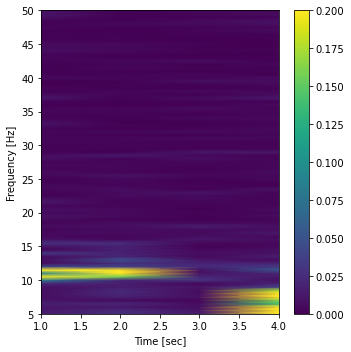

True Alpha : 10


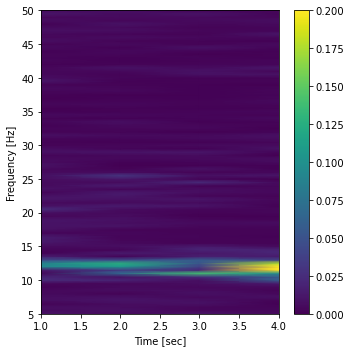

True Alpha : 11


True Alpha : 12


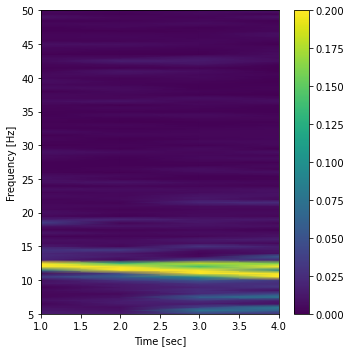

True Alpha : 13


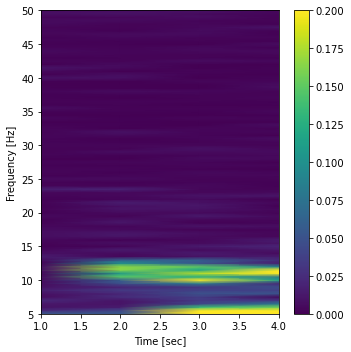

True Alpha : 14


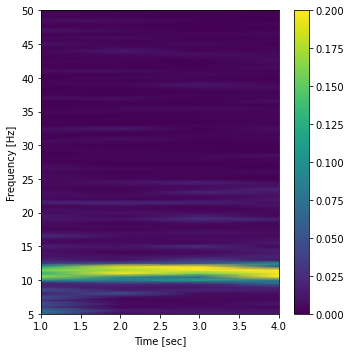

True Alpha : 15


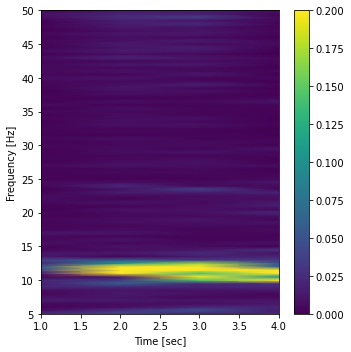

True Alpha : 16


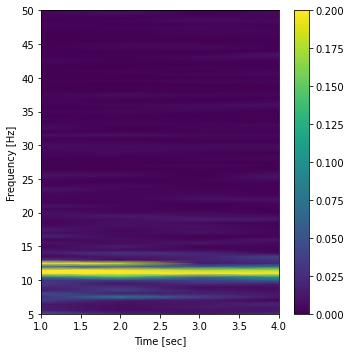

True Alpha : 17


True Alpha : 18


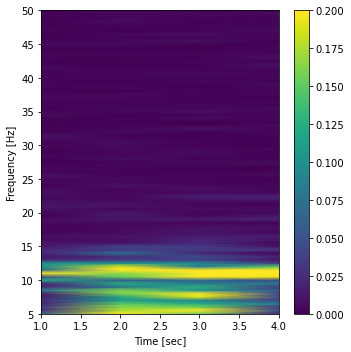

True Alpha : 19


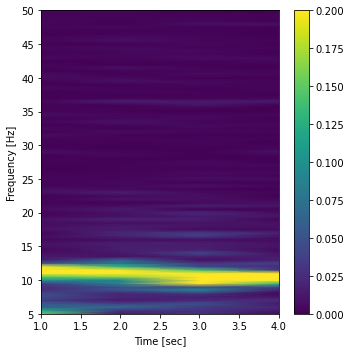

True Alpha : 20


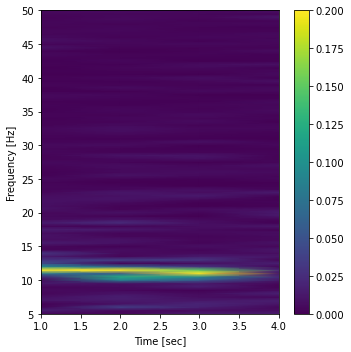

True Alpha : 21


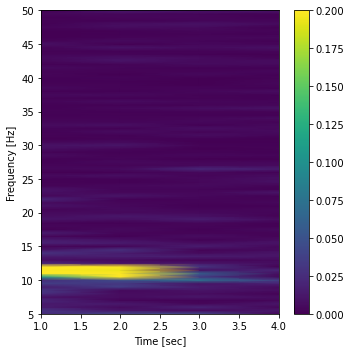

True Alpha : 22


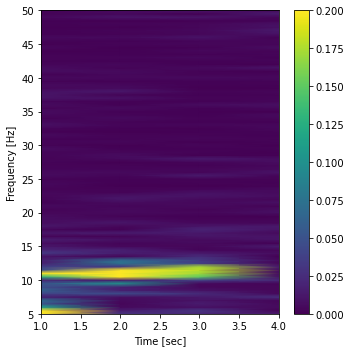

True Alpha : 23


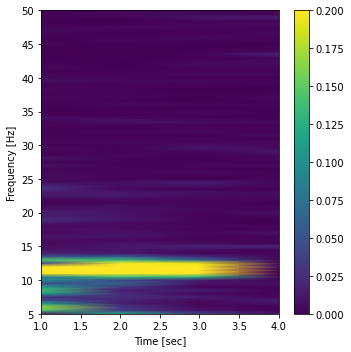

True Alpha : 24


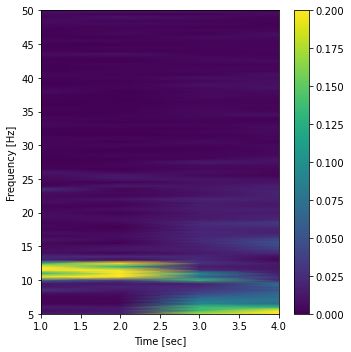

True Alpha : 25


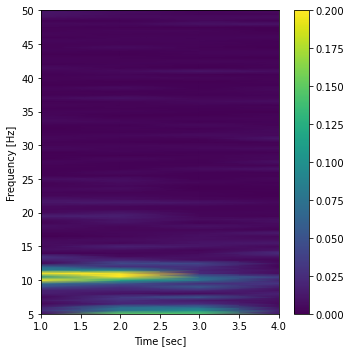

True Alpha : 26


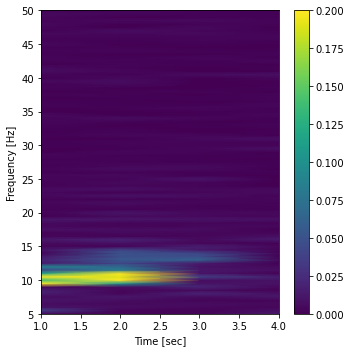

True Alpha : 27


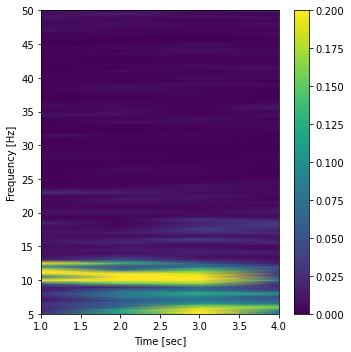

True Alpha : 28


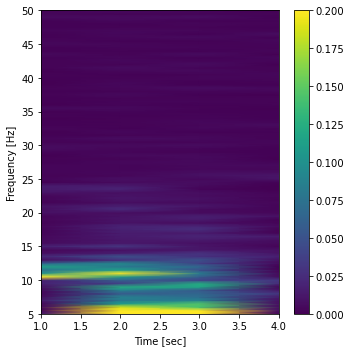

True Alpha : 29


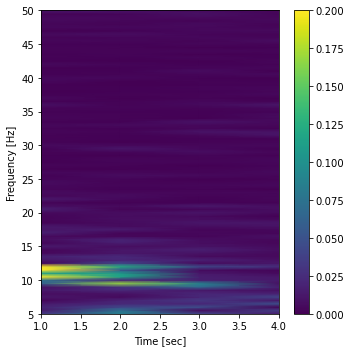

True Alpha : 30


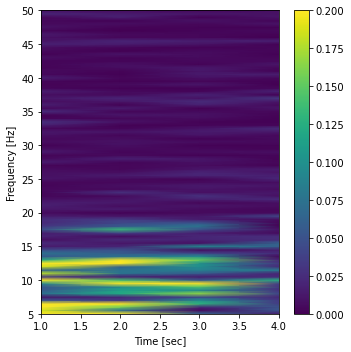

True Alpha : 31


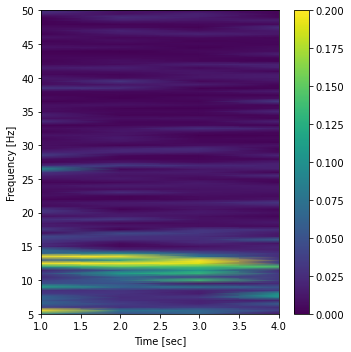

True Alpha : 32


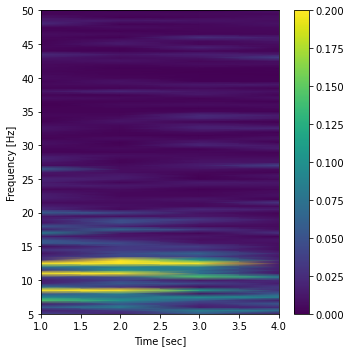

True Alpha : 33


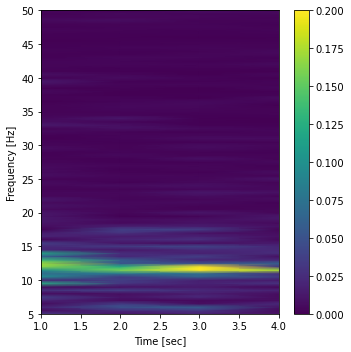

True Alpha : 34


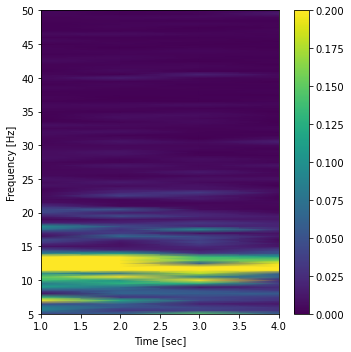

True Alpha : 35


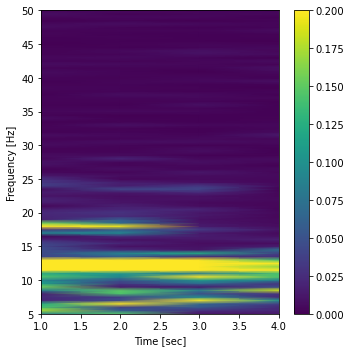

True Alpha : 36


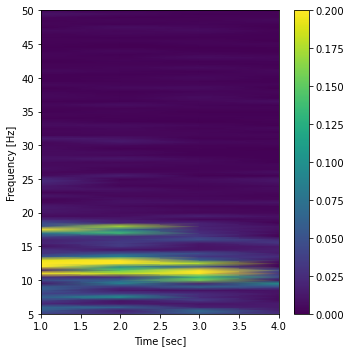

True Alpha : 37


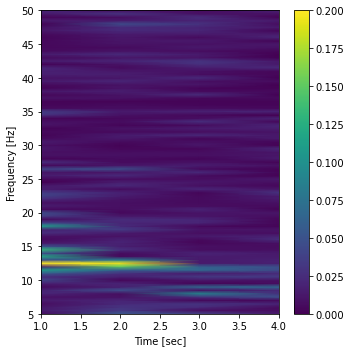

True Alpha : 38


True Alpha : 39


True Alpha : 40


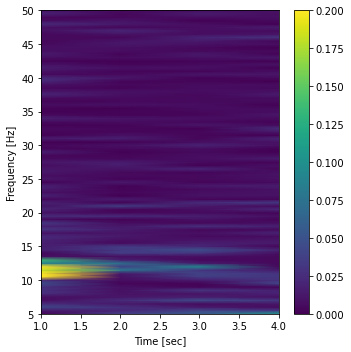

True Alpha : 41


True Alpha : 42


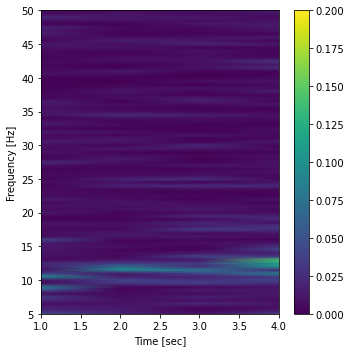

True Alpha : 43


KeyboardInterrupt: 

In [49]:
eegData.plot_all_alpha_spectrograms(vmax=0.2)

In [11]:
eegData.create_SSVEP_spectrograms(nperseg=4000, noverlap=3800)

False SSVEP : 0


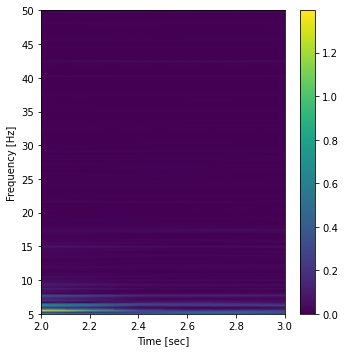

False SSVEP : 1


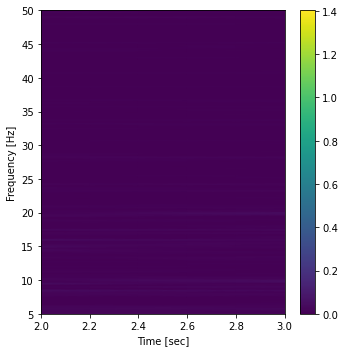

False SSVEP : 2


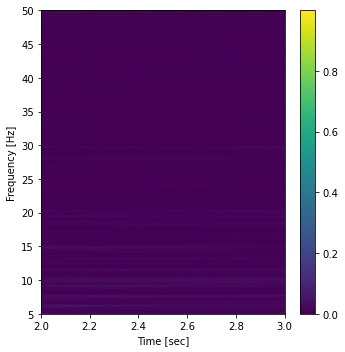

False SSVEP : 3


False SSVEP : 4


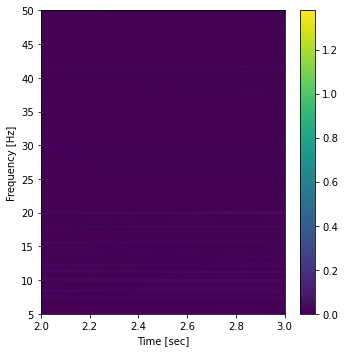

False SSVEP : 5


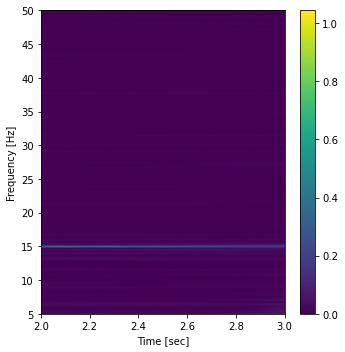

False SSVEP : 6


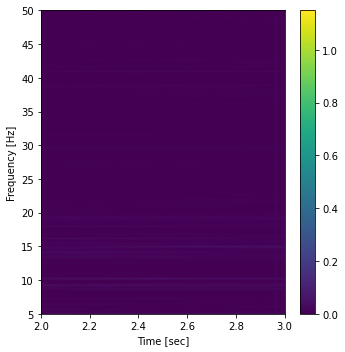

False SSVEP : 7


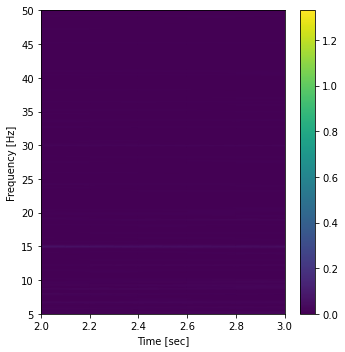

False SSVEP : 8


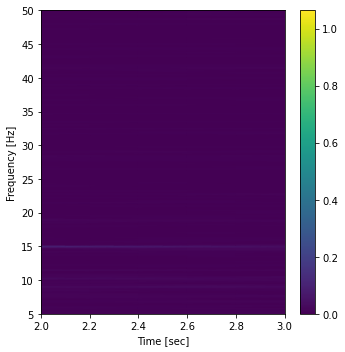

False SSVEP : 9


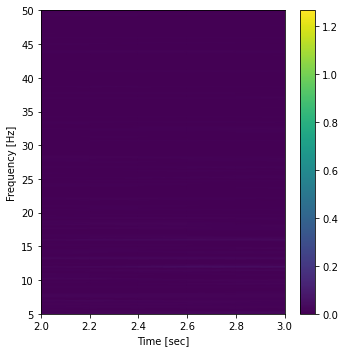

False SSVEP : 10


False SSVEP : 11


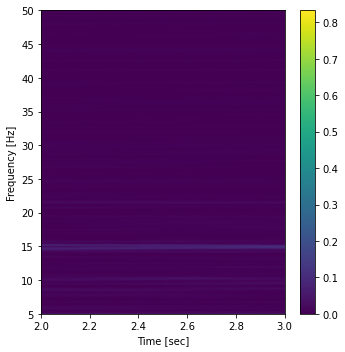

False SSVEP : 12


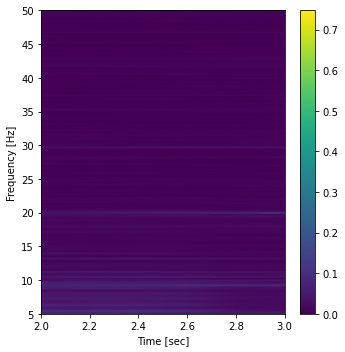

False SSVEP : 13


False SSVEP : 14


False SSVEP : 15


False SSVEP : 16


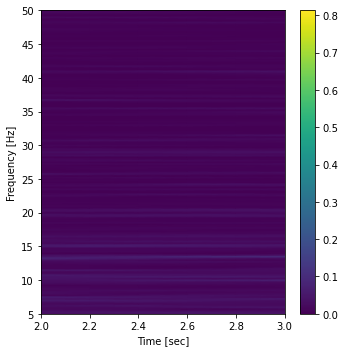

False SSVEP : 17


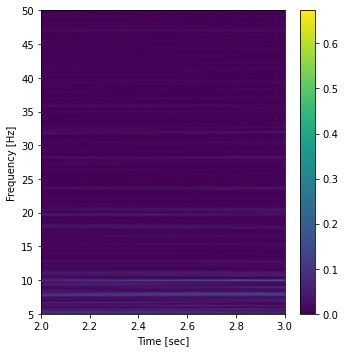

False SSVEP : 18


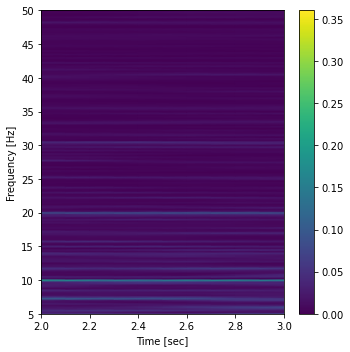

False SSVEP : 19


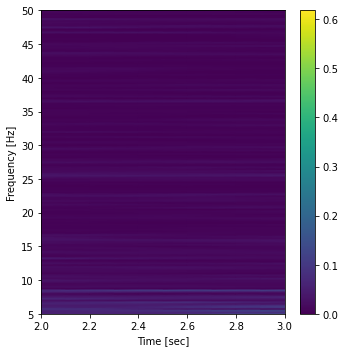

False SSVEP : 20


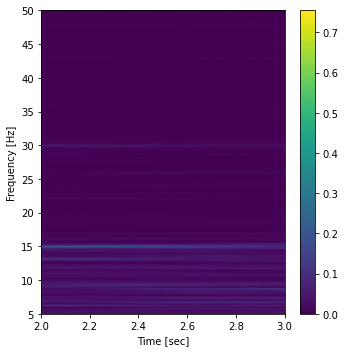

False SSVEP : 21


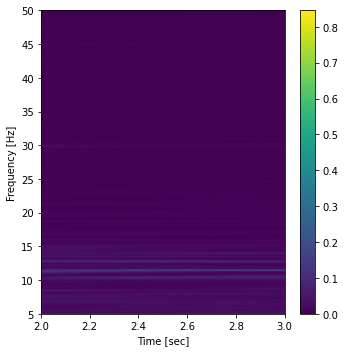

False SSVEP : 22


False SSVEP : 23


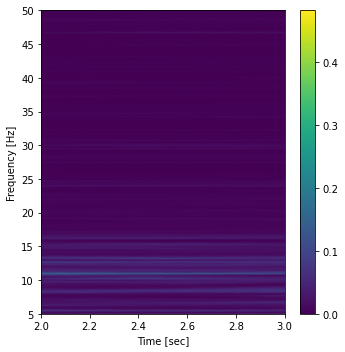

False SSVEP : 24


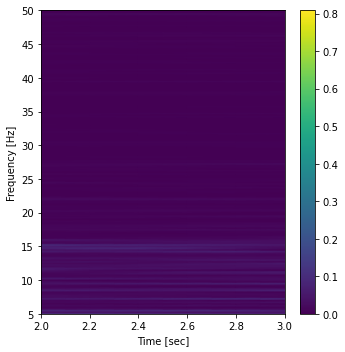

False SSVEP : 25


False SSVEP : 26


False SSVEP : 27


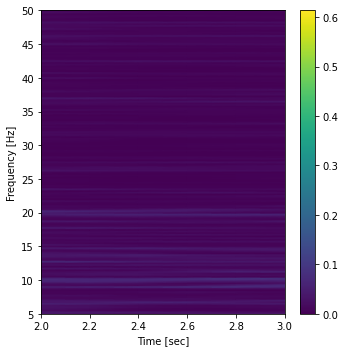

False SSVEP : 28


False SSVEP : 29


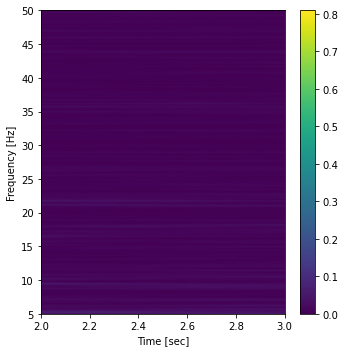

True SSVEP : 0


True SSVEP : 1


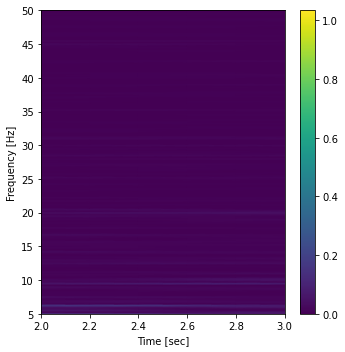

True SSVEP : 2


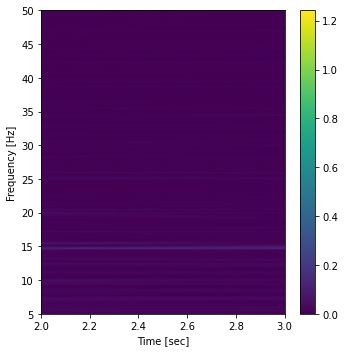

True SSVEP : 3


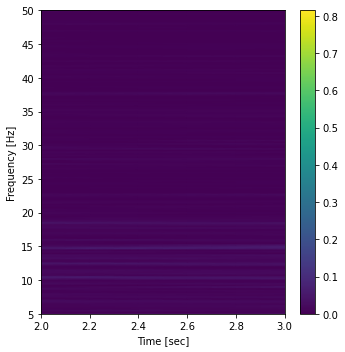

True SSVEP : 4


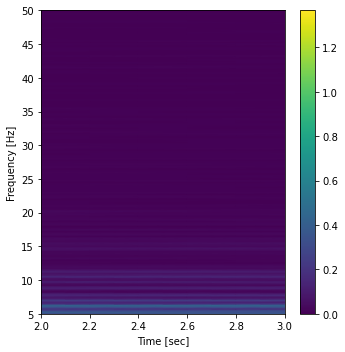

True SSVEP : 5


True SSVEP : 6


True SSVEP : 7


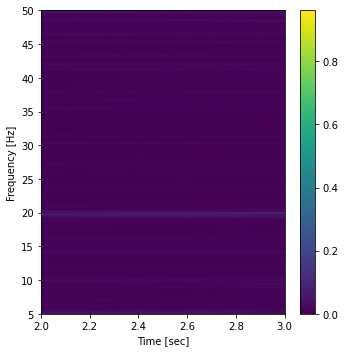

True SSVEP : 8


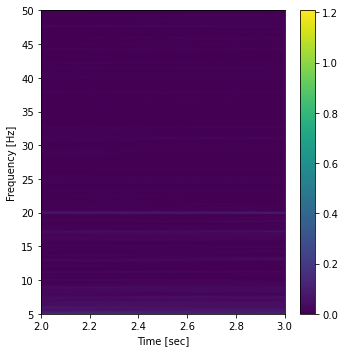

True SSVEP : 9


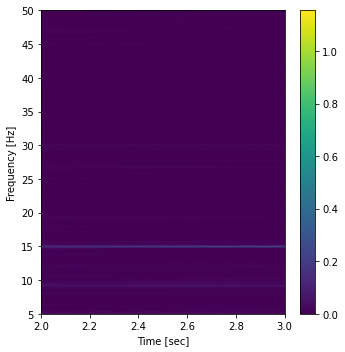

True SSVEP : 10


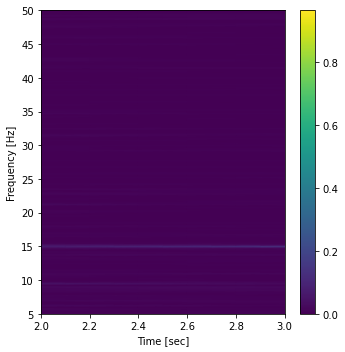

True SSVEP : 11


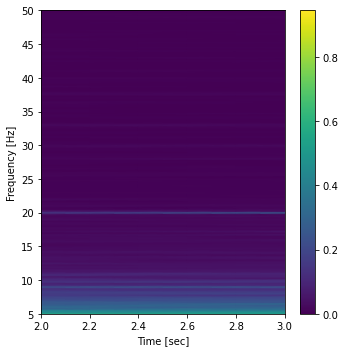

True SSVEP : 12


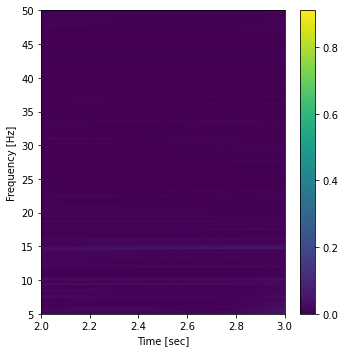

True SSVEP : 13


True SSVEP : 14


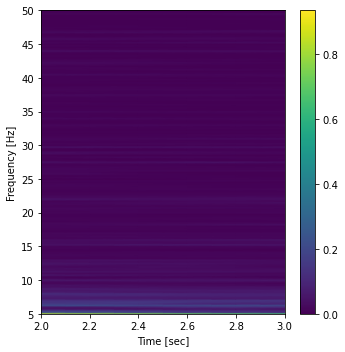

True SSVEP : 15


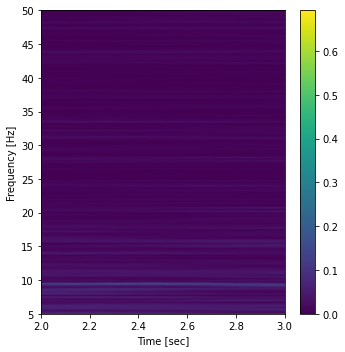

True SSVEP : 16


True SSVEP : 17


True SSVEP : 18


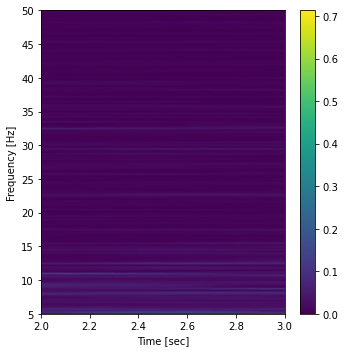

True SSVEP : 19


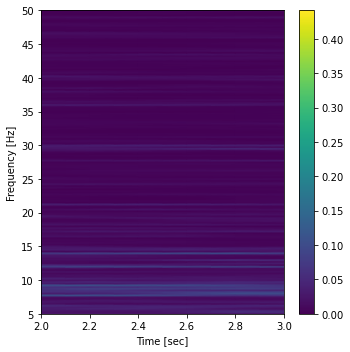

True SSVEP : 20


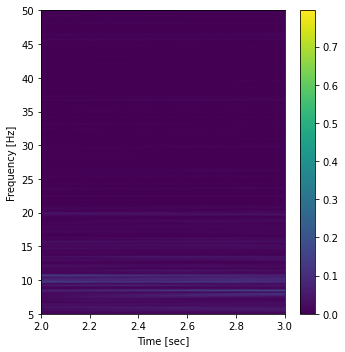

True SSVEP : 21


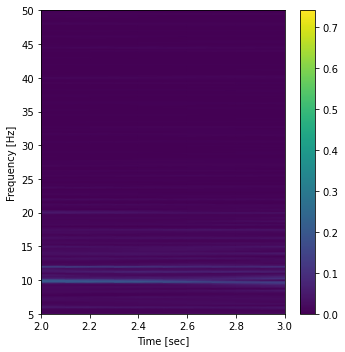

True SSVEP : 22


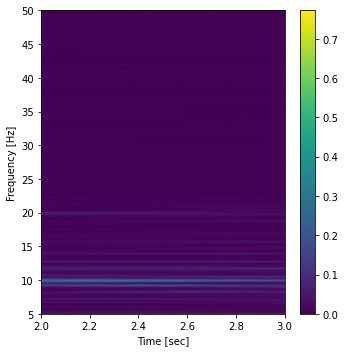

True SSVEP : 23


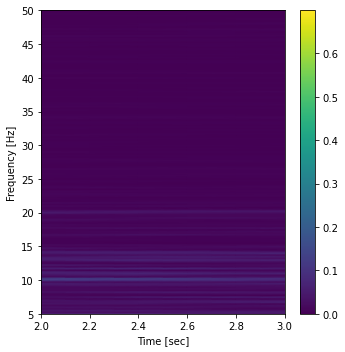

True SSVEP : 24


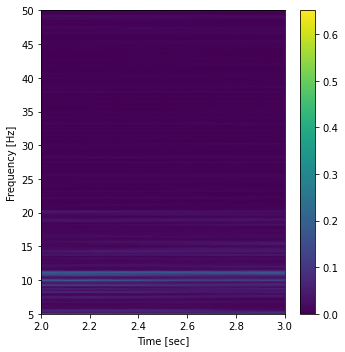

True SSVEP : 25


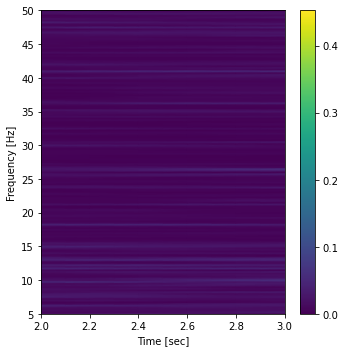

True SSVEP : 26


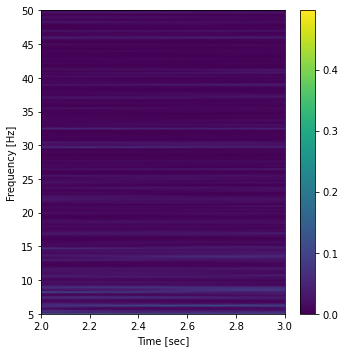

True SSVEP : 27


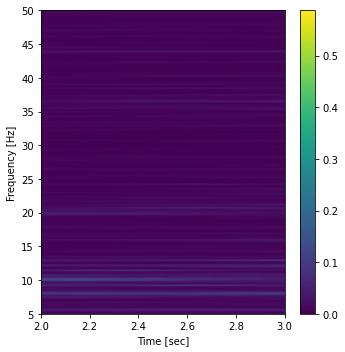

True SSVEP : 28


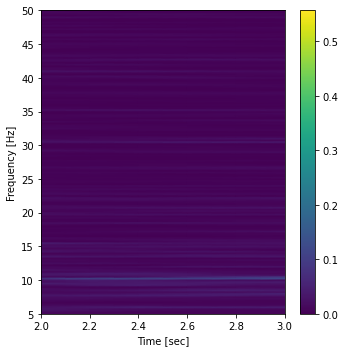

True SSVEP : 29


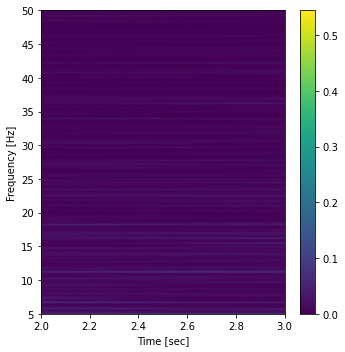

In [12]:
eegData.plot_all_SSVEP_spectrograms(vmax=None)

In [14]:
eegData.prepare_SSVEP_data_for_ml(train_fraction=0.8)

In [15]:
eegData.SSVEP_train_df['group'].value_counts()

2    64
1    64
0    64
Name: group, dtype: int64

In [16]:
eegData.fit_SSVEP_ML_and_report(use_gpu=True)

In [43]:
eegData.best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5462, verbose=0,
                       warm_start=False)

In [30]:
eegData.SSVEP_score_grid

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.6505  0.6927  0.5956  0.6869   
rf               Random Forest Classifier    0.6089  0.6617  0.6144  0.6419   
ridge                    Ridge Classifier    0.5937  0.0000  0.5611  0.6265   
lda          Linear Discriminant Analysis    0.5779  0.5924  0.5356  0.5727   
nb                            Naive Bayes    0.5774  0.6534  0.4567  0.6229   
gbc          Gradient Boosting Classifier    0.5726  0.6219  0.5744  0.5910   
lr                    Logistic Regression    0.5618  0.6084  0.5289  0.5850   
lightgbm  Light Gradient Boosting Machine    0.5574  0.5588  0.5189  0.5548   
knn                K Neighbors Classifier    0.5484  0.5822  0.3978  0.6008   
ada                  Ada Boost Classifier    0.5424  0.5700  0.5122  0.5452   
qda       Quadratic Discriminant Analysis    0.5361  0.5361  0.5633  0.5348   
dt               Decision Tree Classifier    0.5321  0.5328  0.5300  0.5483   
svm                   SVM - Linear Kernel    0.5047  0.0000  0.7211  0.5445   

              F1   Kappa     MCC  TT (Sec)  
et        0.6225  0.3055  0.3197     0.538  
rf        0.6047  0.2208  0.2353     0.542  
ridge     0.5701  0.1924  0.1904     0.030  
lda       0.5445  0.1605  0.1620     0.075  
nb        0.5137  0.1569  0.1718     0.034  
gbc       0.5692  0.1497  0.1593     1.404  
lr        0.5320  0.1289  0.1320     0.045  
lightgbm  0.5192  0.1145  0.1176     0.901  
knn       0.4635  0.0990  0.1159     0.737  
ada       0.5169  0.0852  0.0920     0.667  
qda       0.5402  0.0719  0.0741     0.107  
dt        0.5242  0.0649  0.0714     0.048  
svm       0.5440  0.0041  0.0071     0.038

Nate's todo:

In [31]:
import pycaret.classification as pyclf

pyclf.evaluate_model(eegData.best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
eegData.best_model.predict(eegData.SSVEP_test_df.drop('target', axis=1))

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1])

In [17]:
eegData.best_model.score(eegData.SSVEP_test_df.drop('target', axis=1), eegData.SSVEP_test_df['target'])

0.5208333333333334

In [18]:
eegData.best_model.score(eegData.SSVEP_train_df.drop('target', axis=1), eegData.SSVEP_train_df['target'])

0.6979166666666666

In [92]:
from sklearn.ensemble import RandomForestClassifier
new_clf = RandomForestClassifier(**eegData.best_model.get_params())
new_clf.set_params(max_depth=2, max_features=50, n_estimators=50)
new_clf.fit(eegData.SSVEP_train_df.drop('target', axis=1), eegData.SSVEP_train_df['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=5462, verbose=0,
                       warm_start=False)

In [93]:
new_clf.score(eegData.SSVEP_train_df.drop('target', axis=1), eegData.SSVEP_train_df['target'])

0.8489583333333334

In [94]:
new_clf.score(eegData.SSVEP_test_df.drop('target', axis=1), eegData.SSVEP_test_df['target'])

0.5208333333333334

In [119]:
eegData.create_SSVEP_spectrograms(nperseg=1000, noverlap=900)

False SSVEP : 0


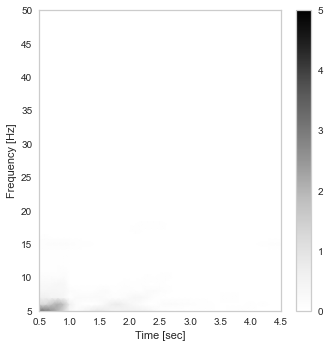

False SSVEP : 1


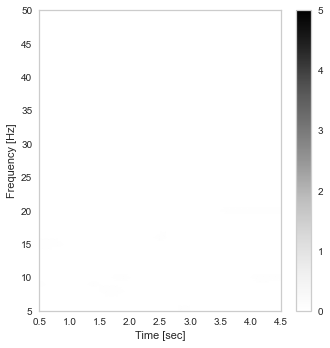

False SSVEP : 2


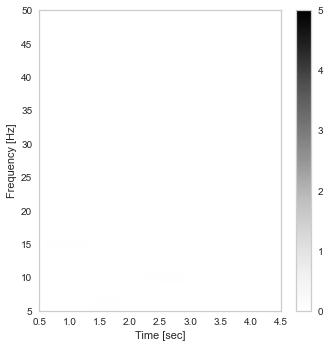

False SSVEP : 3


False SSVEP : 4


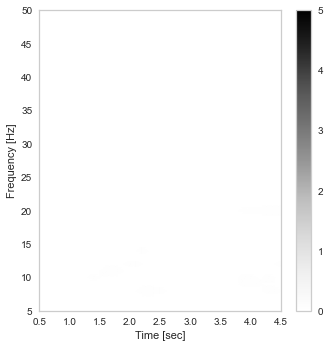

False SSVEP : 5


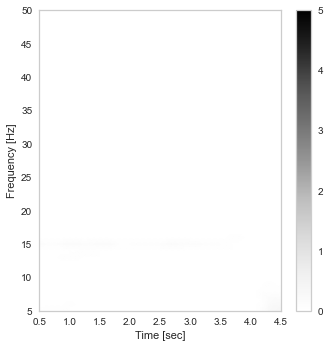

False SSVEP : 6


False SSVEP : 7


False SSVEP : 8


False SSVEP : 9


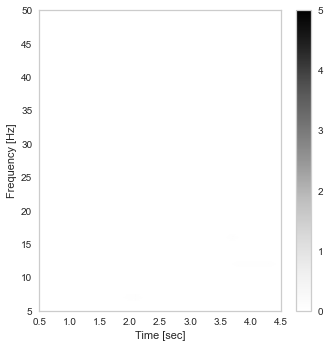

False SSVEP : 10


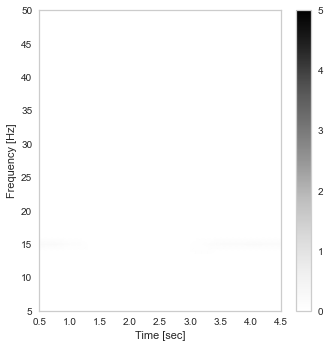

False SSVEP : 11


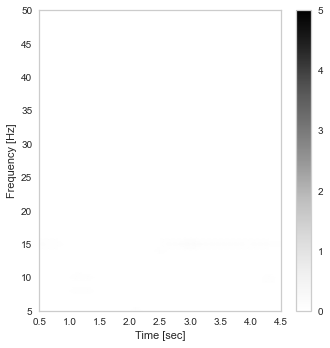

False SSVEP : 12


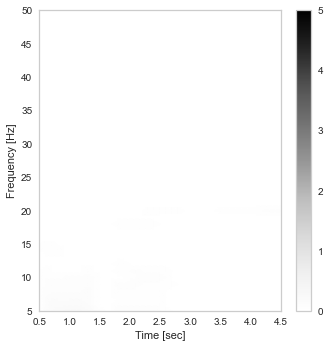

False SSVEP : 13


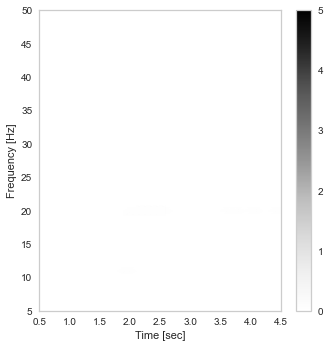

False SSVEP : 14


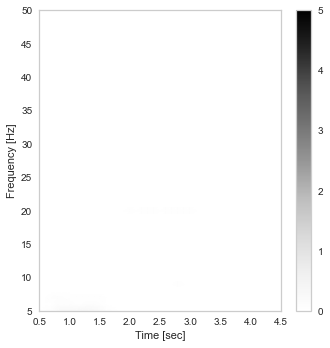

False SSVEP : 15


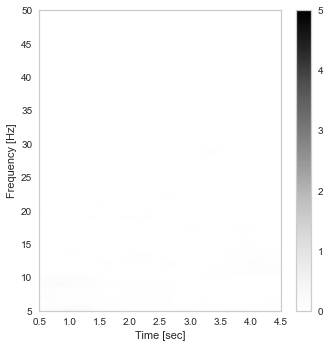

False SSVEP : 16


False SSVEP : 17


False SSVEP : 18


False SSVEP : 19


False SSVEP : 20


False SSVEP : 21


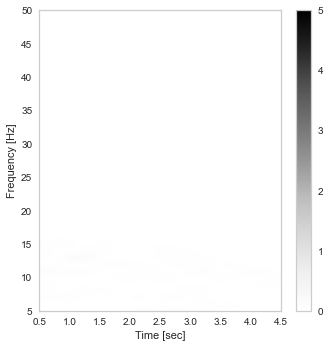

False SSVEP : 22


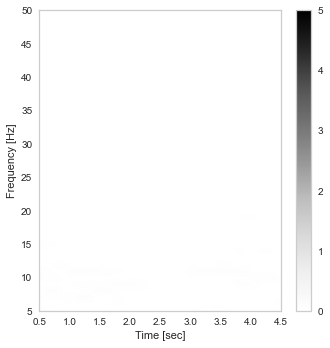

False SSVEP : 23


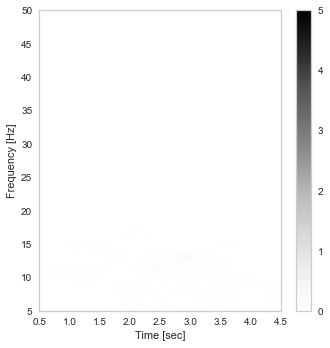

False SSVEP : 24


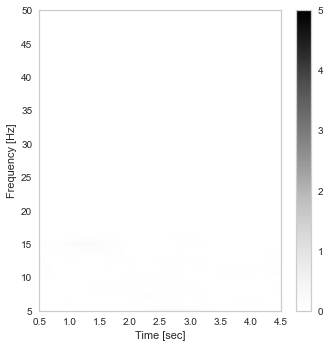

False SSVEP : 25


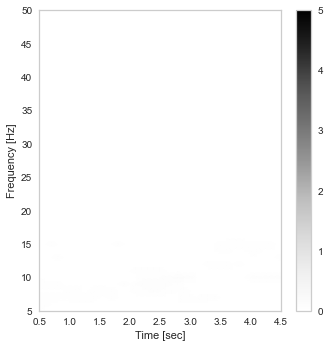

False SSVEP : 26


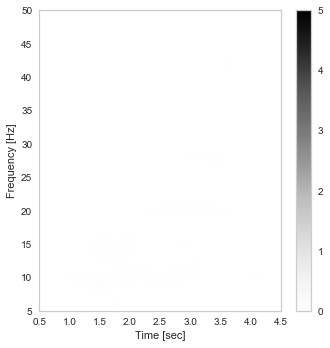

False SSVEP : 27


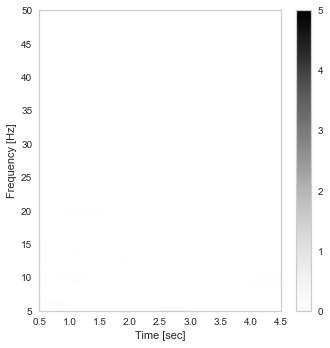

False SSVEP : 28


False SSVEP : 29


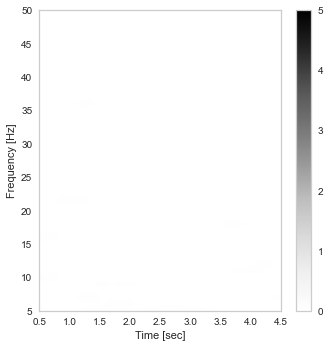

True SSVEP : 0


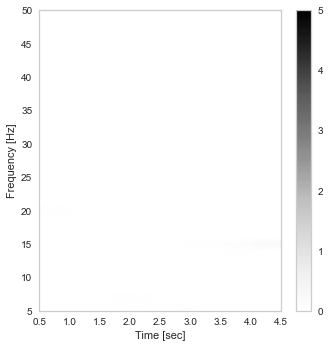

True SSVEP : 1


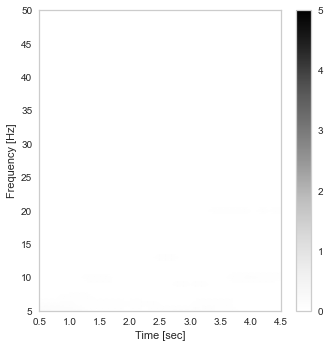

True SSVEP : 2


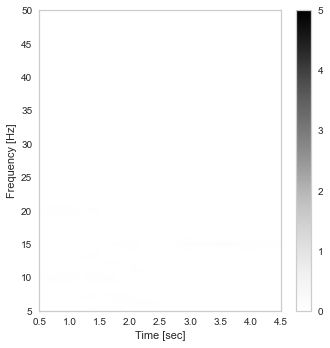

True SSVEP : 3


True SSVEP : 4


True SSVEP : 5


True SSVEP : 6


True SSVEP : 7


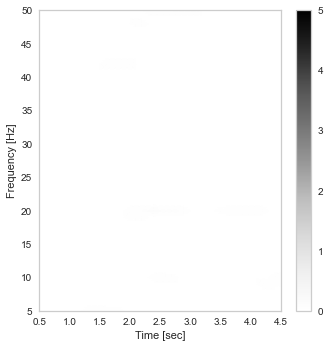

True SSVEP : 8


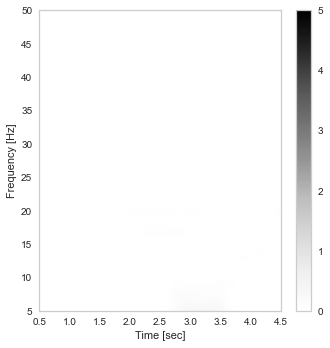

True SSVEP : 9


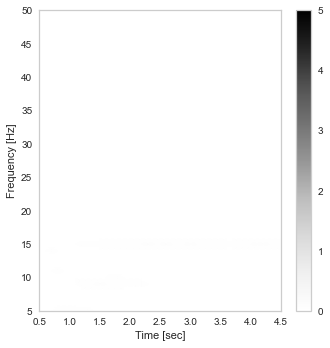

True SSVEP : 10


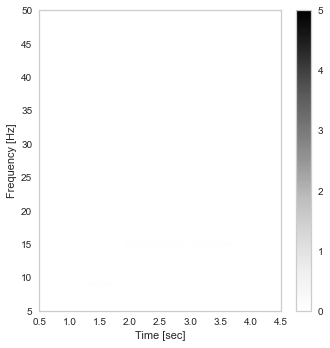

True SSVEP : 11


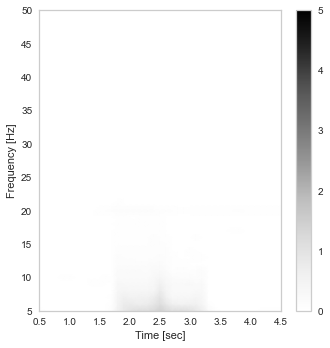

True SSVEP : 12


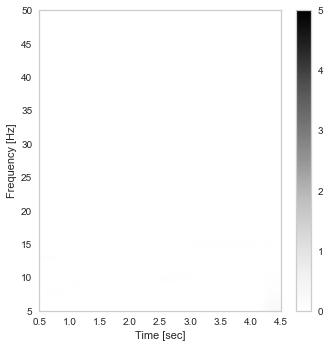

True SSVEP : 13


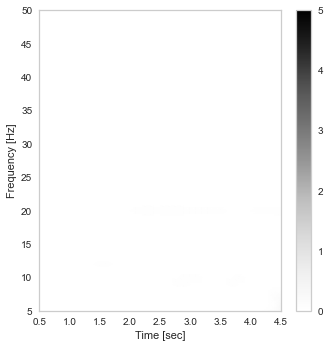

True SSVEP : 14


True SSVEP : 15


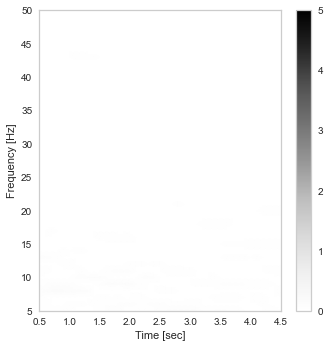

True SSVEP : 16


KeyboardInterrupt: 

In [123]:
eegData.plot_all_SSVEP_spectrograms()

In [120]:
eegData.SSVEP_spectrograms_true[0].spectrograms.shape

(501, 41)

In [121]:
eegData.SSVEP_spectrograms_true[0].frequencies

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [122]:
eegData.SSVEP_spectrograms_true[0].times

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5])

In [99]:
eegData.SSVEP_train_df.shape

(192, 1002)

In [47]:
eegData.best_model.fit(eegData.SSVEP_train_df.drop('target', axis=1), eegData.SSVEP_train_df['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5462, verbose=0,
                       warm_start=False)

In [39]:
tuned_best = pyclf.tune_model(eegData.best_model, search_library='scikit-optimize')

In [ ]:
from yellowbrick import

In [ ]:
eegData.fit_motor_imagery_and_report()

## Check spectrograms in order

In [21]:
eegData.get_all_epochs()

In [25]:
eegData.data.ch_names

['Fp1',
 'Fp2',
 'CP1',
 'CP2',
 'FC1',
 'FC2',
 'O1',
 'O2',
 'F7',
 'F8',
 'Fz',
 'Cz',
 'T3',
 'T4',
 'P3',
 'P4']

In [26]:
o_chns = eegData.SSVEP_epochs.get_data()[:, 6:8, :]

In [29]:
import scipy.signal as spsig

2


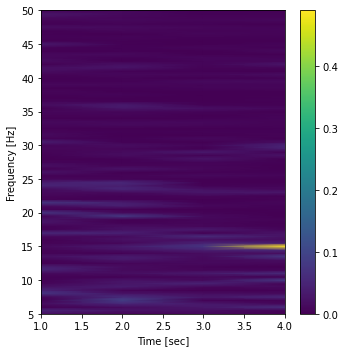

1


1


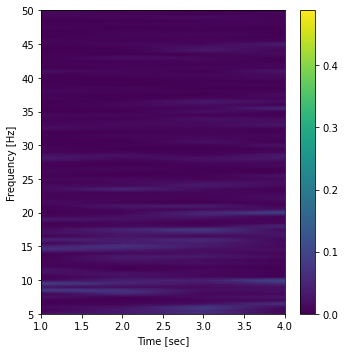

2


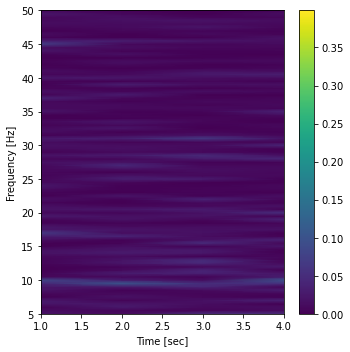

2


1


2


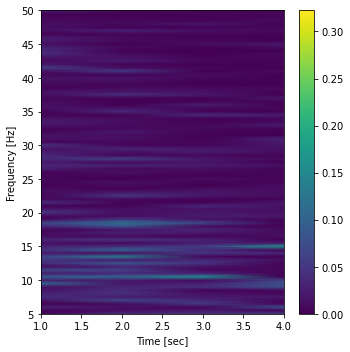

1


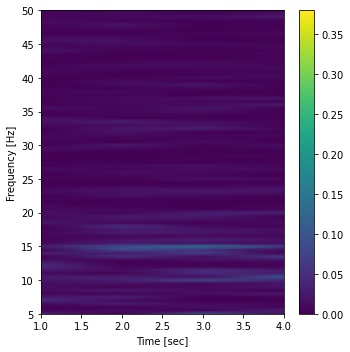

1


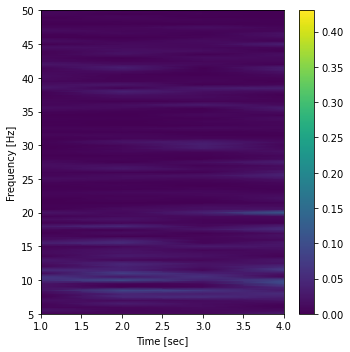

2


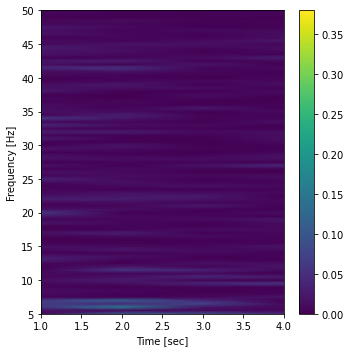

1


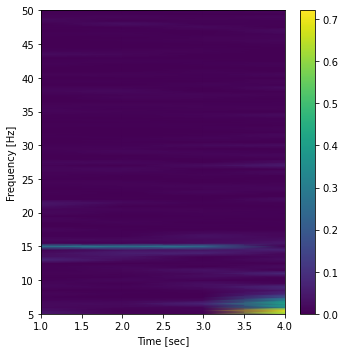

2


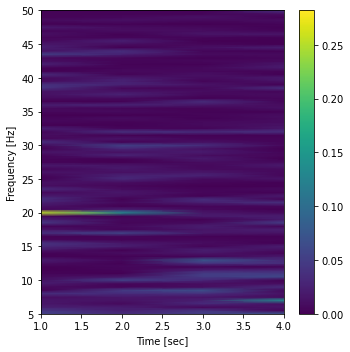

2


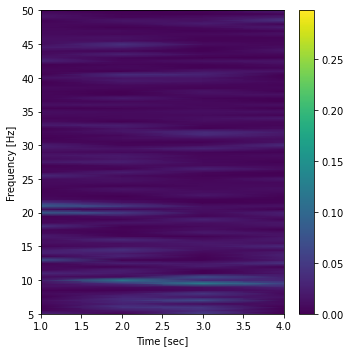

2


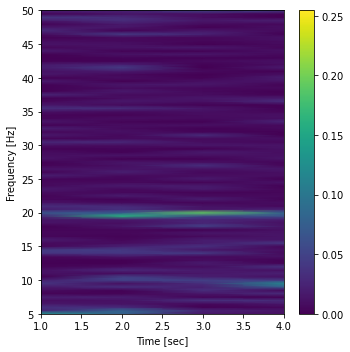

2


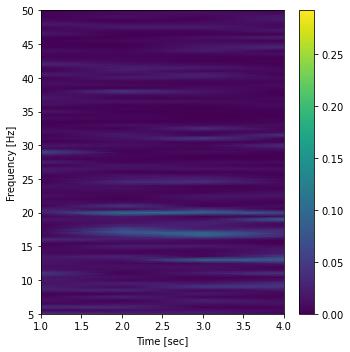

2


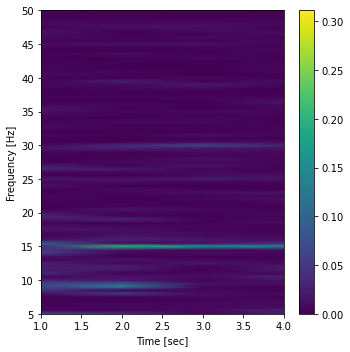

1


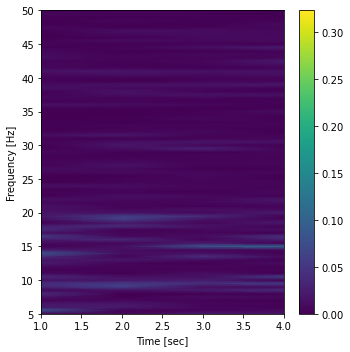

1


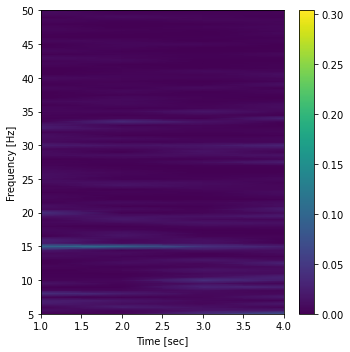

1


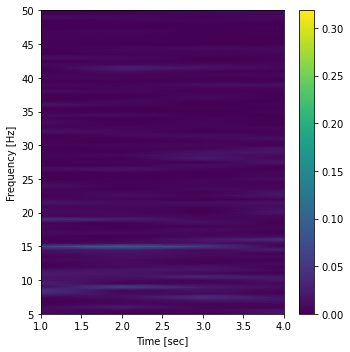

1


1


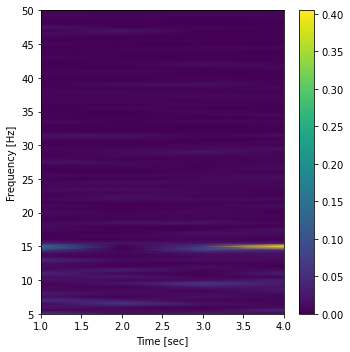

1


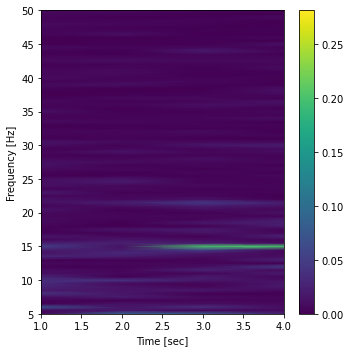

1


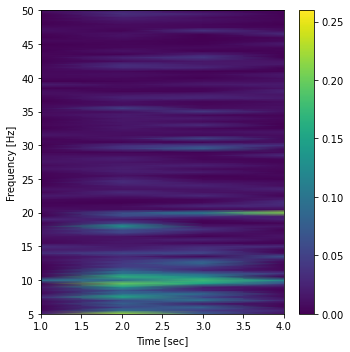

2


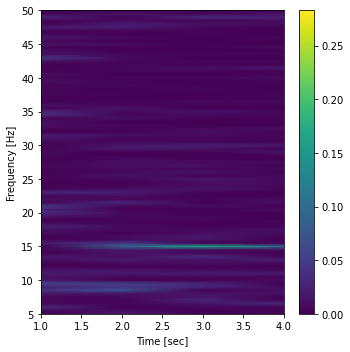

1


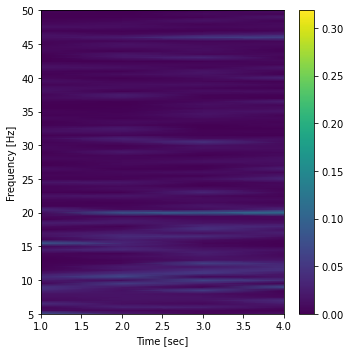

2


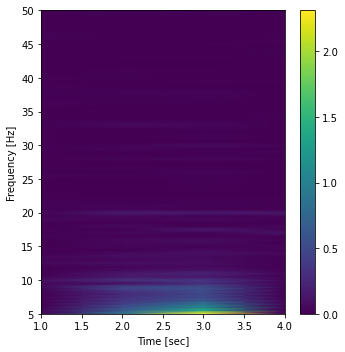

2


1


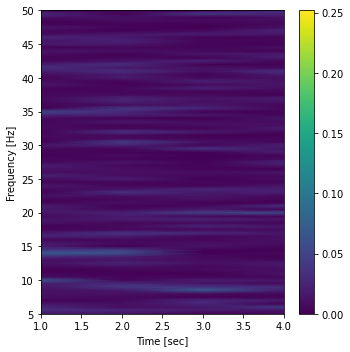

2


2


1


2


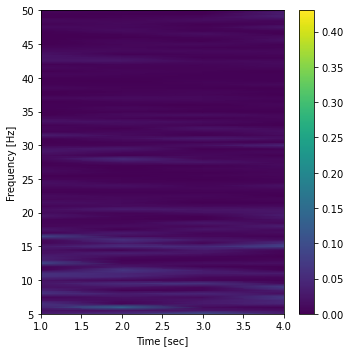

1


2


2


1


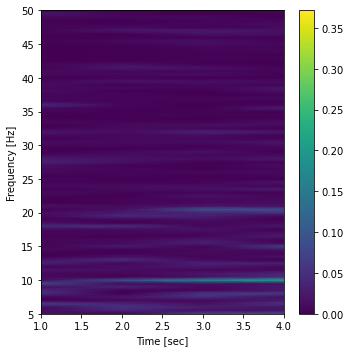

2


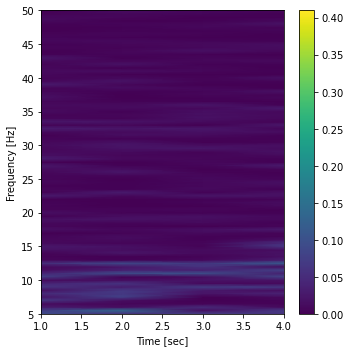

1


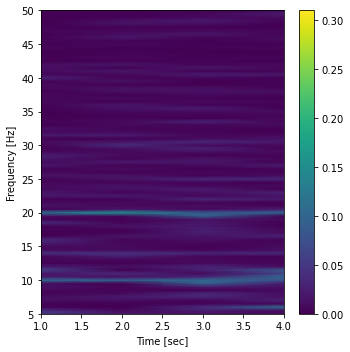

2


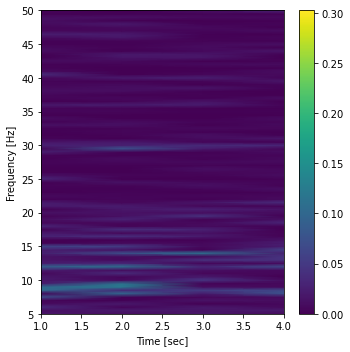

1


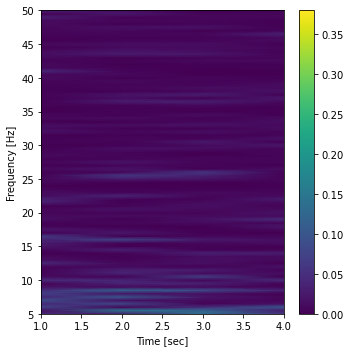

1


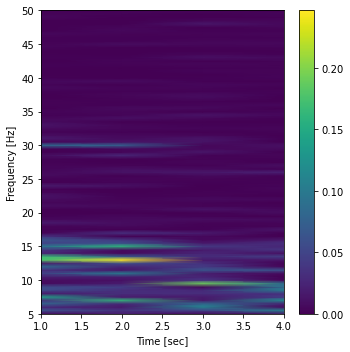

1


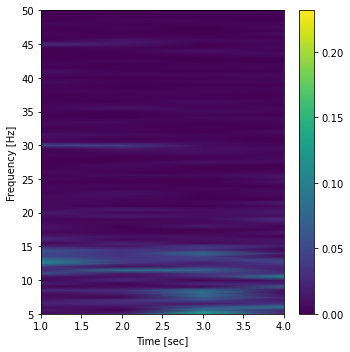

2


2


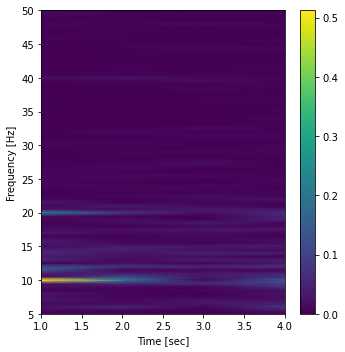

2


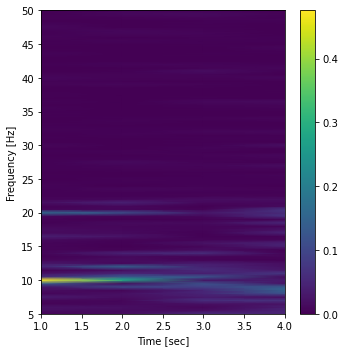

2


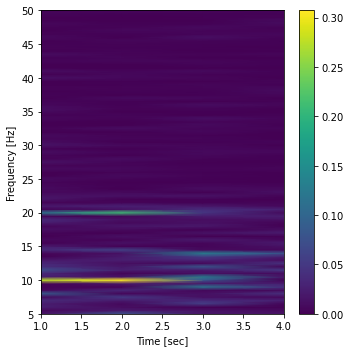

1


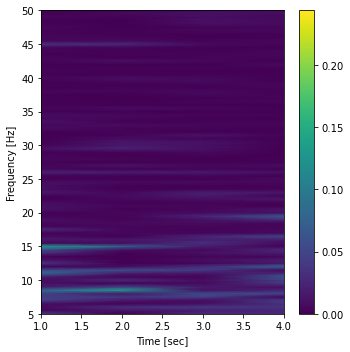

2


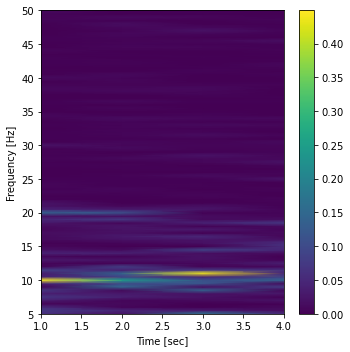

1


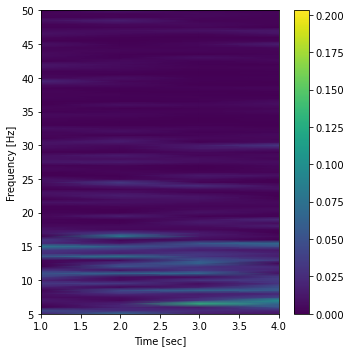

1


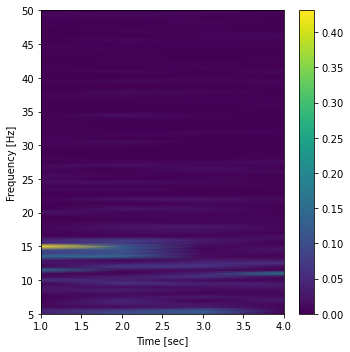

1


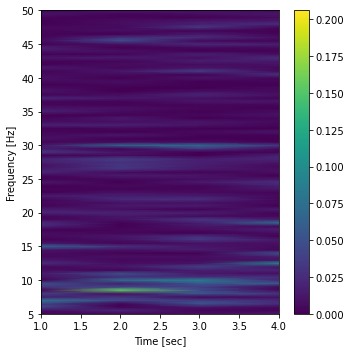

1


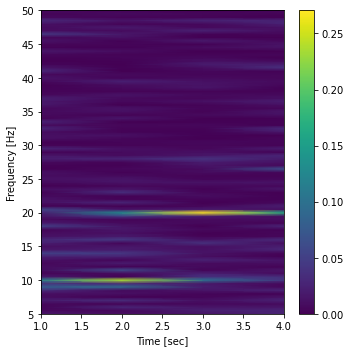

2


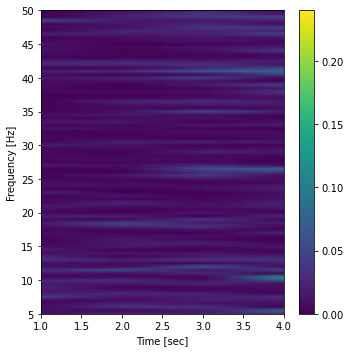

1


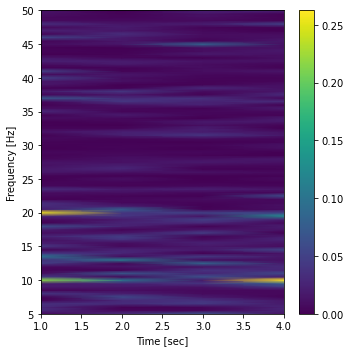

2


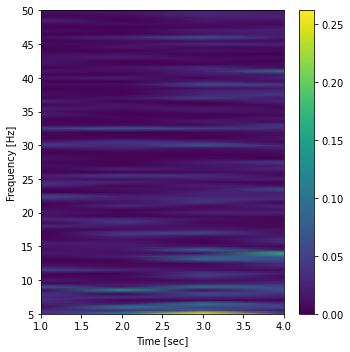

2


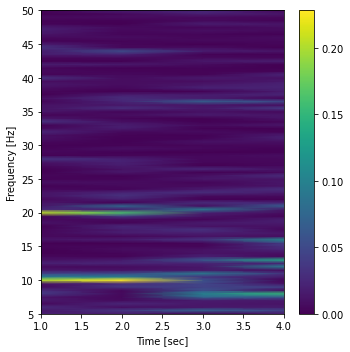

2


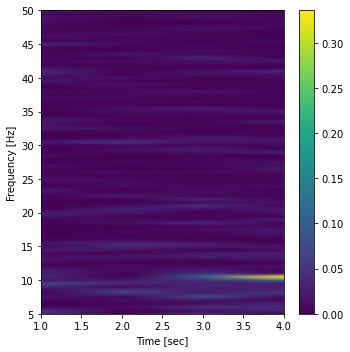

1


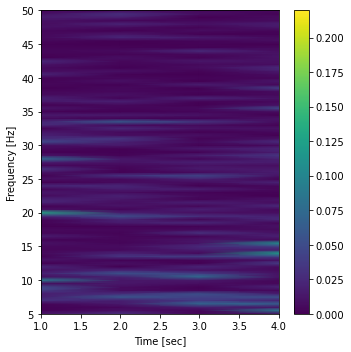

2


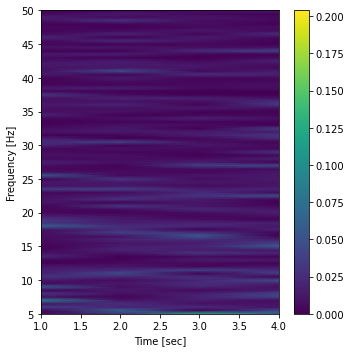

1


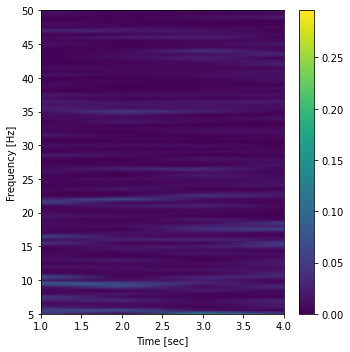

In [58]:
for ev_id, exp in zip(eegData.SSVEP_epochs.events[:, -1], range(o_chns.shape[0])):
    frequencies, times, spectrogram = spsig.spectrogram(o_chns[exp, 0, :],
                                                                fs=1000,
                                                                nperseg=2000,
                                                                noverlap=1000)
    sd = dpp.spectrogramData(spectrogram, frequencies, times)
    print(ev_id)
    eegData.plot_spectrogram(sd)

# motor imagery and actual

In [139]:
eegData.fit_motor_imagery_and_report()

In [140]:
eegData.best_mi_clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2398)

In [141]:
eegData.best_mi_clf.score(eegData.mi_csp_df_test.drop(['target'], axis=1), eegData.mi_csp_df_test['target'])

0.6296296296296297

In [ ]:
eegData.fit_motor_imagery_and_report()
eegData.fit_motor_actual_and_report()
eegData.fit_laryngeal_imagery_and_report()
eegData.fit_laryngeal_actual_and_report()


# functions for making figures
# eegData.raw_data_figure()
# eegData.alpha_wave_figure()
# eegData.SSVEP_figure()
eegData.motor_spectrogram_figures()  # one for actual, one for imagery
eegData.laryngeal_spectrogram_figures()  # one for actual, one for imagery
eegData.csp_figures()  # MI, MA, LI, LA CSP figures